<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/VerticalGradientColoredLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Python Example: Plot Line with Vertically Gradient Colors</h1></b>

Dr. Bingsen Wang

11/22/2023
</center>

#Python Code
The Python code illustrates a line with multiple colors.

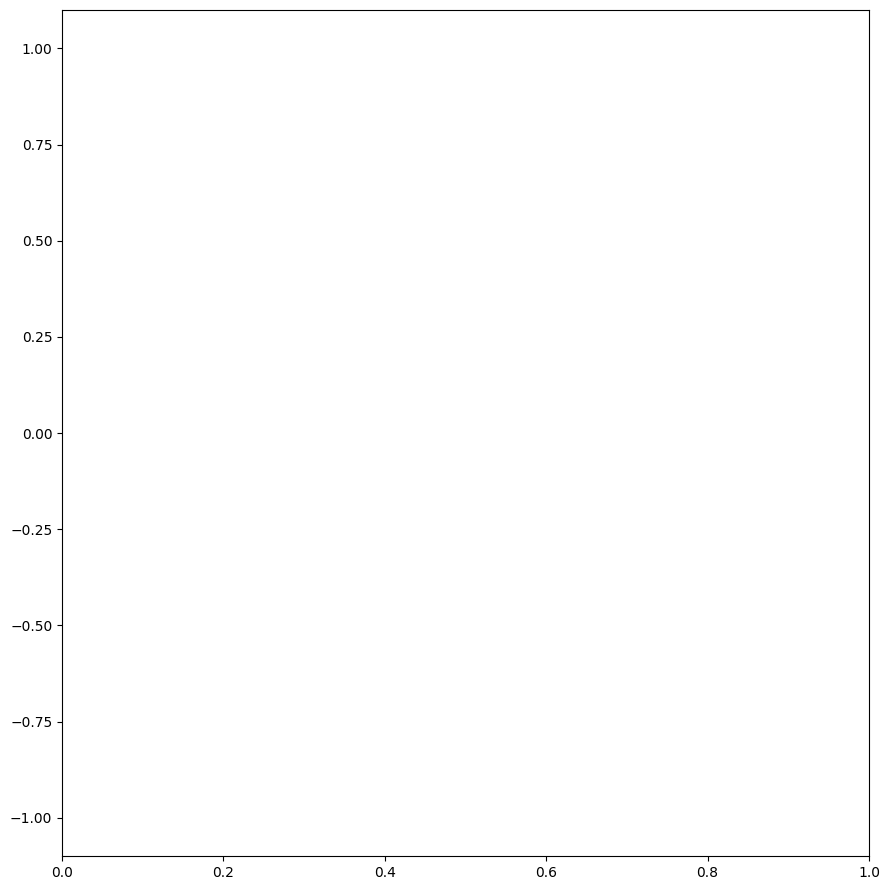

In [4]:
from os import linesep
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc,colors
rc('animation', html='jshtml')
Nf = 500 #number of animation frames
x = np.linspace(0,1,Nf+1) #time series
y = np.sin(x*2*np.pi)
ymax = max(y)
ymin = min(y)
ky = (ymax-y)/(ymax-ymin) #ratio for color gradient
fig = plt.figure(figsize=(9,9))
ax = plt.axes(xlim=(0, 1), ylim=(-1.1, 1.1))
fig.tight_layout()
# ax.axis('off') #turn off axis
lines = [] # array that holds the lines
rgb_max = colors.to_rgb('r') #color of maximum value
rgb_min = colors.to_rgb('b') #color of minmum value
for k in range(Nf): # set up Nf curves
  lines.append(ax.plot([], [], lw=4)[0])

def init(): #initialize Nf curves with empty data
  for k in range(Nf):
    lines[k].set_data([],[]) #initialize the line segaments of phase-a
  return

def animate(i): # animation function.  This is called sequentially
  lines[i].set_data([x[i],x[i+1]],[y[i],y[i+1]])
  lines[i].set_color(((1-ky[i])*rgb_max[0] + ky[i]*rgb_min[0],
                      (1-ky[i])*rgb_max[1] + ky[i]*rgb_min[1],
                      (1-ky[i])*rgb_max[2] + ky[i]*rgb_min[2]))
  # lines[i].set_linestyle(lslst[i%len(lslst)])
  return
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"PythonExample_VerticalColoredLine.mp4"
writervideo = animation.FFMpegWriter(fps=25) #save the video at 30 frames per sec
anim.save(fn, writer=writervideo,dpi = 200)